## **FIX IDENTIFIKASI PENYAKIT EARLY BLIGHT PADA DAUN TOMAT MENGGUNAKAN MODEL DENSENET264 BERBASIS TRANSFER LEARNING**

# **1. DATA UNDERSTANDING**

Data understanding terdiri dari Data acquisition, Data exploration dan verifikasi data

Data Acquition => Mendownload Dataset Dari Kaggle Menggunakan API kaggle

Data Exploration, Verifikasi Data => dilakukan secara manual



# 1.1 DATA ACQUISITION

dilakukan menggunakan Kaggle API

- Masuk ke akun kaggle
- pilih create New API token
- file bernama kaggle.json akan diunduh yang berisi nama pengguna dan kunci token kaggle
- Selanjutnya mengikuti langkah-langkah kodingan berikut

## **Menghubungkan collab dengan penyimpanan google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Melakukan Import Library Yang dibutuhkan**

In [ ]:
%%capture
import tensorflow as tf
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import os
import zipfile
from PIL import Image

from tensorflow.keras import layers
import seaborn as sns

import keras
import keras.backend as K
from time import time

from google.colab import files

## **Install Kaggle**

In [ ]:
!pip install kaggle

## **Upload file kaggle.json yang sudah diunduh dari kaggle tadi**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Pindahkan file kaggle.json kedalam folder baru bernama kaggle
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## **Download Dataset dengan menggunakan API Comand dari dataset tersebut**


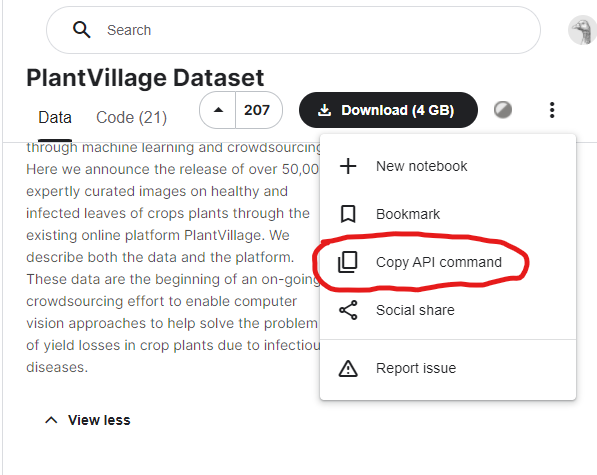

Kemudian API tersebut dicopy kan kesini

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:45<00:00, 81.2MB/s]
100% 2.04G/2.04G [00:45<00:00, 48.5MB/s]


## **Melakukan unzip file yang sudah didownload tadi, dan kemudian hasil ekstrak file tersebut dipindahkan kedalam directory lain yang sudah ditentukan**

In [ ]:
local_zip = '/content/plantvillage-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/dataset_awal')

zip_ref.close()

Setelah diekstrak ke dalam directory tersebut, selanjutnya buat folder baru bernama data_tomat, dan pindahlan dataset tomat ke folder tersebut


# 1.2 DATA EXPLORATION dan VERIFIKASI DATA

melihat jumlah data tomat yang didapatkan dan melihat masing-masing jumlah kategori penyakit tomat dan ukuran dari image yang didapatkan

## **Melihat ukuran semua image yang didapatkan**

In [ ]:
list_tomat_awal = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing')
list_tomat_awal

['Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Early_blight']

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___healthy',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Target_Spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Late_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPS

In [ ]:
lebar = []
panjang = []
nama = []

for folder_images in total:
  for dirpath, _, filenames in os.walk(folder_images):
      for path_image in filenames:
          image = os.path.abspath(os.path.join(dirpath, path_image))
          with Image.open(image) as img:
              width, heigth = img.size
              nama.append(path_image)
              lebar.append(width)
              panjang.append(heigth)


In [ ]:
df_ukuran = pd.DataFrame({'File':nama,
                          'Width':lebar,
                          'Height':panjang})
df_ukuran

,File,Width,Height
0,35343df4-2017-47f9-a5ef-d08bd52dfd7c___Crnl_L....,256,256
1,43728975-7569-464b-b67d-a2b3d0f5ddd5___Crnl_L....,256,256
2,63ed021f-afc3-44cc-ab70-0bacc9815d3e___Crnl_L....,256,256
3,82567342-f689-4e61-ac38-b25db55bb684___Crnl_L....,256,256
4,c92cbefd-7687-4a82-a07e-95cf5990c1d9___Crnl_L....,256,256
...,...,...,...
18161,fe856320-407c-4390-9960-a6a539371182___RS_Erly...,256,256
18162,ff422d28-d002-4382-80bf-30f78f66c677___RS_Erly...,256,256
18163,fe46f781-a40c-4c73-9e2c-50872f1ab370___RS_Erly...,256,256
18164,ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly...,256,256


In [ ]:
df_ukuran.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.csv')

In [ ]:
data_ukuran = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.csv')

In [ ]:
data_ukuran = data_ukuran[['File','Width','Height']]
data_ukuran

,File,Width,Height
0,35343df4-2017-47f9-a5ef-d08bd52dfd7c___Crnl_L....,256,256
1,43728975-7569-464b-b67d-a2b3d0f5ddd5___Crnl_L....,256,256
2,63ed021f-afc3-44cc-ab70-0bacc9815d3e___Crnl_L....,256,256
3,82567342-f689-4e61-ac38-b25db55bb684___Crnl_L....,256,256
4,c92cbefd-7687-4a82-a07e-95cf5990c1d9___Crnl_L....,256,256
...,...,...,...
18161,fe856320-407c-4390-9960-a6a539371182___RS_Erly...,256,256
18162,ff422d28-d002-4382-80bf-30f78f66c677___RS_Erly...,256,256
18163,fe46f781-a40c-4c73-9e2c-50872f1ab370___RS_Erly...,256,256
18164,ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly...,256,256


In [ ]:
data_ukuran.to_excel('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [ ]:
df_ukuran['Width'].value_counts()

256    18166
Name: Width, dtype: int64

In [ ]:
df_ukuran['Height'].value_counts()

256    18166
Name: Height, dtype: int64

# **2. DATA PREPARATION**

Data preparation terdiri dari Data cleaning, Data selection dan Data Transformation

Data Celaning => mengganti nama file disesuaikan dengan folder secara lokal

Data selection => dilakukan pembagian data menjadi val, train, test

Data transformation => melakukan scaling, normalization, augmentasi




# 2.1 DATA CLEANING

buat folder baru yang bernama sesudah_preprocesing yang berisi 3 folder yaitu folder early_blight, sehat, dan folder penyakit lainnya yang berisi gambar daun tomat yang terkena penyakit selain earl_blight


## **Setelah dibuat 3 folder tadi didalam fodler  sesudah_preprocesing, selanjutnya seluruh masing-masing gambar direname berdasarkan nama folder nya (rename secara manual)**

## **Setelah itu buat folder-folder yang dibutuhkan dalam setiap proses, diantaranya folder data_csv_A, data_csv_B, data_csv_C, serta folder model yang didalamnya terdapat fodler modelA, modelB, modelC (buat di google drive)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Mempersiapkan data training, validation, dan testing**

SKENARIO SPLIT DATA :

- A => 80% training : 10% validation : 10% tetsing
- B => 70% training : 15% validation : 15% tetsing

# **A. SKENARIO PEMBAGIAN DATA (80:10:10)**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/SKRIPSI/data_split_A", seed=1337, ratio=(.8, .1, .1))

Copying files: 3000 files [01:16, 39.23 files/s] 


In [ ]:
os.listdir('/content/drive/MyDrive/SKRIPSI/data_split_A')

['train', 'val', 'test']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/SKRIPSI/data_split_A"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/SKRIPSI/data_split_A/train')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

In [ ]:
#sel ini happus aja

tomat_path =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing/{tomat}')
  tomat_path.append(dir)
  print(f'Jumlah image tomat {tomat} : {len(os.listdir(dir))}')

Jumlah image tomat early_blight : 1000
Jumlah image tomat penyakit_lainnya : 1000
Jumlah image tomat sehat : 1000


In [ ]:
tomat_path

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/penyakit_lainnya']

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_A/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/SKRIPSI/data_split_A/test/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/test/sehat',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (423).JPG,0
1,early_blight (564).JPG,0
2,early_blight (684).JPG,0
3,early_blight (740).JPG,0
4,early_blight (668).JPG,0
...,...,...
295,penyakit_lainnya (590).JPG,2
296,penyakit_lainnya (583).JPG,2
297,penyakit_lainnya (602).JPG,2
298,penyakit_lainnya (490).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/test_early_blight.csv')

In [ ]:
len(df_test)

300

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (423).JPG,0
1,early_blight (564).JPG,0
2,early_blight (684).JPG,0
3,early_blight (740).JPG,0
4,early_blight (668).JPG,0
...,...,...
295,penyakit_lainnya (590).JPG,2
296,penyakit_lainnya (583).JPG,2
297,penyakit_lainnya (602).JPG,2
298,penyakit_lainnya (490).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_A/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/SKRIPSI/data_split_A/val/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/val/penyakit_lainnya',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/val/sehat']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (530).JPG,0
1,early_blight (760).JPG,0
2,early_blight (244).JPG,0
3,early_blight (483).JPG,0
4,early_blight (825).JPG,0
...,...,...
295,sehat (768).JPG,2
296,sehat (61).JPG,2
297,sehat (813).JPG,2
298,sehat (14).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/val_early_blight.csv')

In [ ]:
len(df_val)

300

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (530).JPG,0
1,early_blight (760).JPG,0
2,early_blight (244).JPG,0
3,early_blight (483).JPG,0
4,early_blight (825).JPG,0
...,...,...
295,sehat (768).JPG,2
296,sehat (61).JPG,2
297,sehat (813).JPG,2
298,sehat (14).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_A/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/SKRIPSI/data_split_A/train/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/train/sehat',
 '/content/drive/MyDrive/SKRIPSI/data_split_A/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2395,sehat (134).JPG,2
2396,sehat (395).JPG,2
2397,sehat (679).JPG,2
2398,sehat (741).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/train_early_blight.csv')

In [ ]:
len(df_train)

2400

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2395,sehat (134).JPG,2
2396,sehat (395).JPG,2
2397,sehat (679).JPG,2
2398,sehat (741).JPG,2


## **Membuat data total format .csv**

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing/penyakit_lainnya',
 '/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing/sehat']

In [ ]:
categories = []
names = []

for i in total:
  for tomat in os.listdir(i):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i.split('/')[7])
    else:
      names.append(tomat)
      categories.append(i.split('/')[7])
    
df_total = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_total

,filename,category
0,early_blight (757).JPG,early_blight
1,early_blight (373).JPG,early_blight
2,early_blight (586).JPG,early_blight
3,early_blight (698).JPG,early_blight
4,early_blight (750).JPG,early_blight
...,...,...
2995,sehat (482).JPG,sehat
2996,sehat (427).JPG,sehat
2997,sehat (914).JPG,sehat
2998,sehat (245).JPG,sehat


## **Simpan df_total dengan nama total_early_blight.csv**

In [ ]:
df_total.to_csv('/content/drive/MyDrive/SKRIPSI/data/total_early_blight.csv')

In [ ]:
#test load csv

df_total = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data/total_early_blight.csv')
df_total = df_total[['filename','category']] #biar kolom unamed nya ilang
df_total

,filename,category
0,early_blight (757).JPG,early_blight
1,early_blight (373).JPG,early_blight
2,early_blight (586).JPG,early_blight
3,early_blight (698).JPG,early_blight
4,early_blight (750).JPG,early_blight
...,...,...
2995,sehat (482).JPG,sehat
2996,sehat (427).JPG,sehat
2997,sehat (914).JPG,sehat
2998,sehat (245).JPG,sehat


## **Buat grafik perbandingan jumlah dari masing-masing kelas prediksi**

early_blight        1000
penyakit_lainnya    1000
sehat               1000
Name: category, dtype: int64

 Total images:  3000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


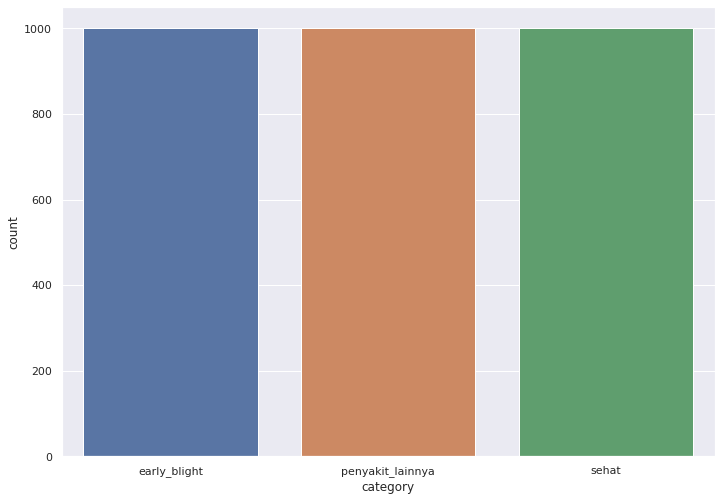

In [ ]:
print(df_total.category.value_counts())
print("\n Total images: ", df_total.shape[0])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df_total.category)
plt.show()

# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

### **ROTATION**

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset

train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 180,
                                   height_shift_range= 0.2,
                                   shear_range=60,
                                   zoom_range =[0.2,1.6],
                                   horizontal_flip = True,
                                   vertical_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 4====
- layers (jumlah fully conected layer) = 512
- Dropout                              = -
- jenis optimizer                      = Adam
- besar learning_rate                  = le-5
- batch_size                           = 64
- epoch                                = 20

====Skenario 5====
- layers (jumlah fully conected layer) = 128
- Dropout                              = 0.2
- jenis optimizer                      = Adam
- besar learning_rate                  = le-5
- batch_size                           = 32
- epoch                                = 30

====Skenario 6====
- layers (jumlah fully conected layer) = 256
- layer dropout                        = 0.2
- jenis optimizer                      = Adam 
- besar learning_rate                  = le-5
- batch_size                           = 32
- epoch                                = 40


# **A4. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-2**

====Skenario 5====
pake cara habib

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(8, activation='relu')(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_14 (ZeroPadding  (None, 230, 230, 3)  0          ['input_10[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_14[0][0]']      
                                )                                                           

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
learningrate_decay = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                                       patience=10, verbose=1, min_lr=1e-20)
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/SKRIPSI/model/model_A5.h5'
model_checkpoint = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
import time 
start_time = time.time()

history = model.fit(train_generator, validation_data=validation_generator, epochs=100,
          verbose=1, callbacks=[model_checkpoint, learningrate_decay, earlystopping])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0115 - acc: 0.4958
Epoch 1: val_acc improved from -inf to 0.58000, saving model to /content/drive/MyDrive/SKRIPSI/model/model_A5.h5
75/75 [==============================] - 50s 557ms/step - loss: 1.0115 - acc: 0.4958 - val_loss: 0.8674 - val_acc: 0.5800 - lr: 1.0000e-05
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.7475 - acc: 0.6413
Epoch 2: val_acc improved from 0.58000 to 0.66000, saving model to /content/drive/MyDrive/SKRIPSI/model/model_A5.h5
75/75 [==============================] - 39s 516ms/step - loss: 0.7475 - acc: 0.6413 - val_loss: 0.7188 - val_acc: 0.6600 - lr: 1.0000e-05
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.6343 - acc: 0.7171
Epoch 3: val_acc improved from 0.66000 to 0.74333, saving model to /content/drive/MyDrive/SKRIPSI/model/model_A5.h5
75/75 [==============================] - 38s 506ms/step - loss: 0.6343 - acc: 0.7171 - val_loss: 0.5972 - v

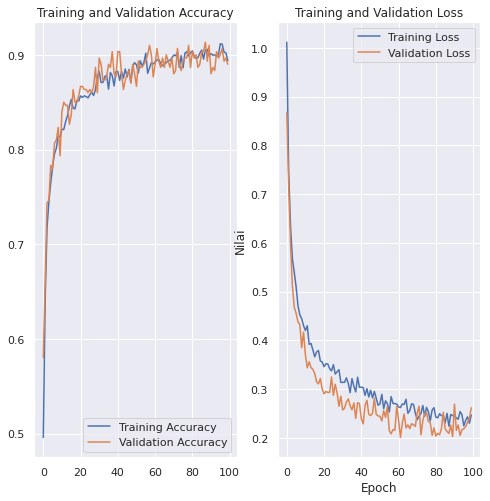

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/SKRIPSI/model/model_A5.h5')

In [ ]:
model.save('/content/drive/MyDrive/SKRIPSI/model/model_A4')

In [ ]:
model.save('/content/drive/MyDrive/SKRIPSI/model/model_A4.h5')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 5s 144ms/step - loss: 0.2095 - acc: 0.9133

 Test accuracy: 0.9133333563804626
Running time: --- 4.790536165237427 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 2s 143ms/step - loss: 0.2846 - acc: 0.8967

 Test accuracy: 0.8966666460037231
Running time: --- 1.7563560009002686 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/SKRIPSI/data/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/SKRIPSI/model/test_preproc_projek_tomatA5.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 19s 24ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1
 1 2 2 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 1 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[86,  1, 13],
       [ 1, 99,  0],
       [ 8,  8, 84]])

In [ ]:
train_dir = '/content/drive/MyDrive/SKRIPSI/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


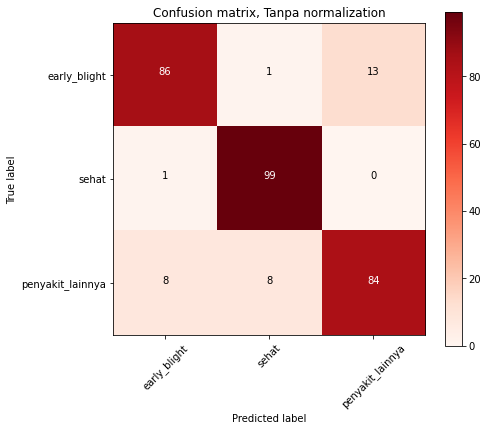

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       100
           1       0.92      0.99      0.95       100
           2       0.87      0.84      0.85       100

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/SKRIPSI/model/model_A5.h5')

Saving FG205pmd-Early-Blight-5586181-thumb-1x1.jpg to FG205pmd-Early-Blight-5586181-thumb-1x1.jpg
[[1.00e+00 2.17e-17 1.31e-15]]
0
early_blight


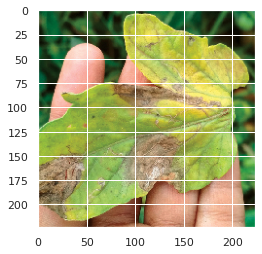

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

Saving 0d259481-e08d-459d-aa92-fe05e1524742___GH_HL Leaf 253.1.JPG to 0d259481-e08d-459d-aa92-fe05e1524742___GH_HL Leaf 253.1.JPG
[[3.87e-03 9.96e-01 4.27e-06]]
1
sehat


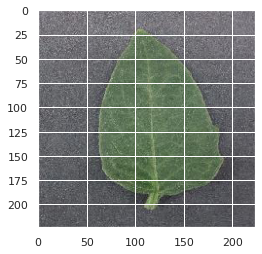

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **B. SKENARIO PEMBAGIAN DATA (70:15:15)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Mempersiapkan data training, validation, dan testing**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/SKRIPSI/data/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/SKRIPSI/data_split_B", seed=1337, ratio=(.7, .15, .15))

Copying files: 3000 files [00:52, 56.64 files/s] 


In [ ]:
os.listdir('/content/drive/MyDrive/SKRIPSI/data_split_B')

['train', 'val', 'test']

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/SKRIPSI/data_split_B/train')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/SKRIPSI/data_split_B"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_B/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/SKRIPSI/data_split_B/test/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/test/sehat',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/test_early_blight.csv')

In [ ]:
len(df_test)

450

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_B/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/SKRIPSI/data_split_B/val/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/val/sehat',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/val/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/val_early_blight.csv')

In [ ]:
len(df_val)

450

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive//SKRIPSI/data_csv_B/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/SKRIPSI/data_split_B/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/SKRIPSI/data_split_B/train/early_blight',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/train/sehat',
 '/content/drive/MyDrive/SKRIPSI/data_split_B/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/train_early_blight.csv')

In [ ]:
len(df_train)

2100

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/SKRIPSI/data_split_B/train')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset

train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 180,
                                   height_shift_range= 0.2,
                                   shear_range=60,
                                   zoom_range =[0.2,1.6],
                                   horizontal_flip = True,
                                   vertical_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 4====
- layers (jumlah fully conected layer) = 128
- Dropout                              = 0.7
- jenis optimizer                      = Adam
- besar learning_rate                  = 0.0001

====Skenario 5====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = Adam
- besar learning_rate                  = 0.01

====Skenario 6====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.2
- jenis optimizer                      = Adam 
- besar learning_rate                  = -


# **B4. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-1**


====Skenario 4====
- layers (jumlah fully conected layer) = 128
- Dropout                              = 0.7
- jenis optimizer                      = Adam
- besar learning_rate                  = 0.0001

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

74850304/74836368 [==============================] - 3s 0us/step


# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(8, activation='relu')(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
learningrate_decay = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                                       patience=10, verbose=1, min_lr=1e-20)
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/SKRIPSI/model/model_B4.h5'
model_checkpoint = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
import time 
start_time = time.time()

history = model.fit(train_generator, validation_data=validation_generator, epochs=100,
          verbose=1, callbacks=[model_checkpoint, learningrate_decay, earlystopping])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 1.0790 - acc: 0.4162 
Epoch 1: val_acc improved from -inf to 0.41333, saving model to /content/drive/MyDrive/SKRIPSI/model/model_B4.h5
66/66 [==============================] - 1670s 25s/step - loss: 1.0790 - acc: 0.4162 - val_loss: 1.0928 - val_acc: 0.4133 - lr: 1.0000e-05
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 0.8633 - acc: 0.5557
Epoch 2: val_acc improved from 0.41333 to 0.49556, saving model to /content/drive/MyDrive/SKRIPSI/model/model_B4.h5
66/66 [==============================] - 35s 526ms/step - loss: 0.8633 - acc: 0.5557 - val_loss: 0.9607 - val_acc: 0.4956 - lr: 1.0000e-05
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 0.7408 - acc: 0.6543
Epoch 3: val_acc improved from 0.49556 to 0.61111, saving model to /content/drive/MyDrive/SKRIPSI/model/model_B4.h5
66/66 [==============================] - 34s 519ms/step - loss: 0.7408 - acc: 0.6543 - val_loss: 0.8161 - 

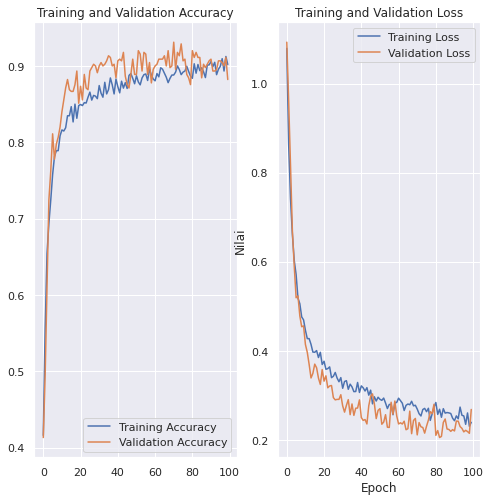

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/SKRIPSI/model/model_B4.h5')

In [ ]:
model.save('/content/drive/MyDrive/SKRIPSI/model/model_B4')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 9s 205ms/step - loss: 0.2111 - acc: 0.9311

 Test accuracy: 0.9311110973358154
Running time: --- 11.14565110206604 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 178s 13s/step - loss: 0.2893 - acc: 0.8933

 Test accuracy: 0.8933333158493042
Running time: --- 204.60727286338806 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/SKRIPSI/data/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/SKRIPSI/model/test_preproc_projek_tomatB4.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 8s 25ms/step
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 0 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 1 2
 0 2 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[127,   0,  23],
       [  2, 144,   4],
       [ 14,   5, 131]])

In [ ]:
train_dir = '/content/drive/MyDrive/SKRIPSI/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


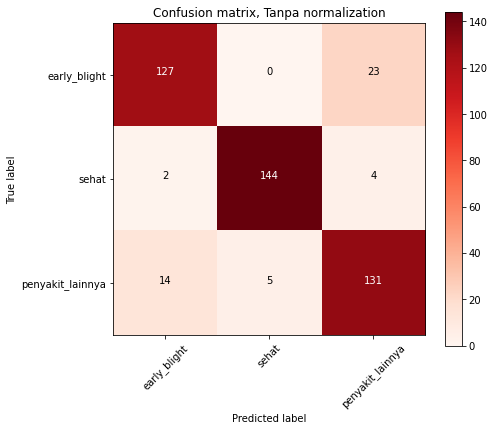

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       150
           1       0.97      0.96      0.96       150
           2       0.83      0.87      0.85       150

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/SKRIPSI/model/model_B4.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)